Lista 1

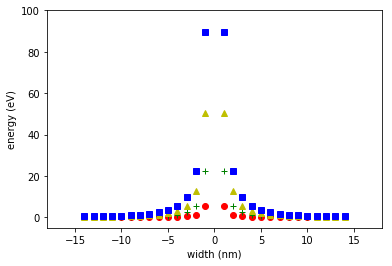

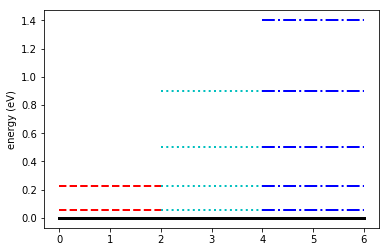

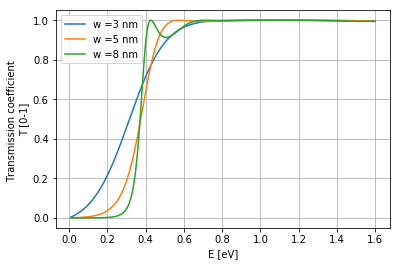

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Mar 24 16:54:15 2018

@author: bartlomiejkos
"""

import numpy as np
import pandas as pd
import cmath
import matplotlib.pyplot as plt



'''---------Applied Quantum Mechanics---------'''

# Zadanie1
'''
Zbadać zależność czterech pierwszych poziomów energetycznych od szerokości studni w dla 
elektronu w nieskończonej studni potencjału w GaAs (m*=0.067m). Rozważyć szerokości 
1nm <w <30nm. Wyniki przedstawić na wykresie.
'''

def zadanie1():
    me = 9.109383e-31 # kg  # declaration of variables
    hbar = 1.053571e-34 # Js
    eV = 1.602176e-19 # J
    n = 4
    mx = me * 0.067
    E = np.empty([n, 29])  # definition of 2D matrix to hold results
    for ni in range(1, n + 1):   # iterating over energy lvls
        for wi in range(-14, 15):  # iterating over well's width
            if wi == 0:
                Ei = 1000    
            else:
                Ei = (hbar**2 * np.pi**2 * ni**2) / (8 * mx * (wi/2)**2 * eV * 1e-9**2)  # i-th energy lvl
            E[ni-1][wi+15-1] = Ei
    E = np.transpose(E)
    E=pd.DataFrame(E, columns=('n1','n2','n3','n4'))  # wrangling data
    plt.plot(range(-14,15), E['n1'], 'ro')
    plt.plot(range(-14,15), E['n2'], 'g+')
    plt.plot(range(-14,15), E['n3'], 'y^')
    plt.plot(range(-14,15), E['n4'], 'bs')
    plt.xlabel('width (nm)')
    plt.ylabel('energy (eV)')
    plt.xlim(-18,18)
    plt.ylim(-5, 100)
    plt.show()
# Zadanie2

'''
Skończona studnia kwantowa szerokości o 10nm . Znaleźć numerycznie wszystkie poziomy 
energetyczne dla głębokości V0=0.5 eV, 1eV i 2eV. Przyjąć masę ładunku m*=0.067m.    
'''

def zadanie2():
    me = 9.109383e-31 # kg  # declaration of variables
    hbar = 1.053571e-34 # Js
    eV = 1.602176e-19 # J
    V = [0.5, 1 , 2] # potential lvls
    E = np.zeros([8,3])
    j = 0
    for i in V: # iterating over potential lvls
        a = 1
        ni = 1
        while a == 1:
            Ei = (hbar**2 * np.pi**2 * ni**2) / (2 * me * 0.067 * 10**2 * eV * 1e-9**2)  # i-th energy lvl
            if Ei < i:    # checking whether Ei is still smaller than V0
                #print(Ei, i)    # energy lvl in accord to V0
                E[ni-1][j] = Ei
                ni = ni + 1
            else:
                a = 0
        j = j + 1
    PLOT(E)
def PLOT(E):
    plt.plot([0, 2], [E[0][0], E[0][0]], color='r', linestyle='--', linewidth=2)
    plt.plot([0, 2], [E[1][0], E[1][0]], color='r', linestyle='--', linewidth=2)
    plt.plot([2, 4], [E[0][1], E[0][1]], color='c', linestyle=':', linewidth=2)
    plt.plot([2, 4], [E[1][1], E[1][1]], color='c', linestyle=':', linewidth=2)
    plt.plot([2, 4], [E[2][1], E[2][1]], color='c', linestyle=':', linewidth=2)
    plt.plot([2, 4], [E[3][1], E[3][1]], color='c', linestyle=':', linewidth=2)
    plt.plot([4, 6], [E[0][2], E[0][2]], color='b', linestyle='-.', linewidth=2)
    plt.plot([4, 6], [E[1][2], E[1][2]], color='b', linestyle='-.', linewidth=2)
    plt.plot([4, 6], [E[2][2], E[2][2]], color='b', linestyle='-.', linewidth=2)
    plt.plot([4, 6], [E[3][2], E[3][2]], color='b', linestyle='-.', linewidth=2)
    plt.plot([4, 6], [E[4][2], E[4][2]], color='b', linestyle='-.', linewidth=2)
    plt.plot([0, 6], [0, 0], color='k', linestyle='-', linewidth=3)
    plt.ylabel('energy (eV)')
    plt.show()

# Zadanie3
'''
Obliczyć współczynnik transmisji T przez barierę energetyczną dla następujących danych 
mw=0.067 m0, mb=0.10 m0, V0= 0.334 eV. Zbadać T(E) dla kilku szerokości bariery w,
 2nm< w<10nm. Wyniki obliczeń przedstawić na wykresach.
'''

def zadanie3():
    #    eV = 1.602176e-19 # J  # declaration of variables
    m0 = 9.10938356
    mw = 0.067 * m0
    mb = 0.10 * m0
    V0 = 0.334
    hbar = 1.0545718
    E = []
    w = [3, 5, 8]
    
    for wi in w:
        T = []
        E = []
        for e in np.linspace(0.01, 1.6, 10000):
            if e == V0:
                continue
            elif e < V0:
                E.append(e)
                k1 = np.sqrt((2 * mw * e) / (hbar**2))
                k2 = np.sqrt((2 * mb * (V0 - e)) / hbar**2)
                t = 1 / (1 + 0.25 * (k1 / k2 + k2 / k1)**2 * (np.sinh(k2 * wi))**2)
                T.append(t)
            else:
                E.append(e)
                k1 = np.sqrt((2 * mw * e) / (hbar**2))
                k2 = np.sqrt((2 * mb * (e - V0)) / hbar**2)
                t = 1 / (1 + 0.25 * (k1 / k2 - k2 / k1)**2 * (np.sin(k2 * wi))**2)
                T.append(t)
        plt.plot(E, T, label = "w =%s nm" %wi)
    plt.legend()
    plt.grid()
    plt.xlabel('E [eV]')
    plt.ylabel('Transmission coefficient \nT [0-1]')
    plt.show()


zadanie1()
zadanie2()    
zadanie3()

Lista 2

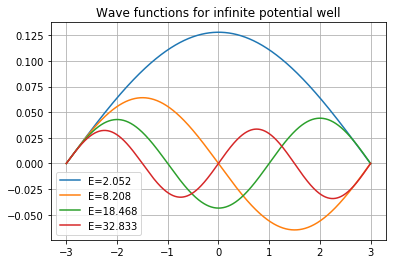

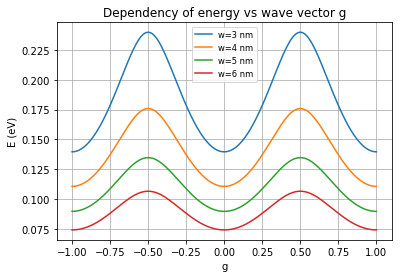

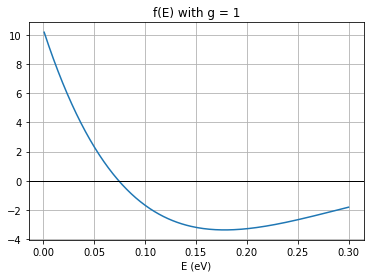

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize_scalar
from scipy.optimize import newton

'''-------Applied Quantum Mechanics-------'''

# Zadanie1

'''
Zastosować zmodyfikowaną metodę strzałów do znalezienia energii i funkcji falowych
'''

def Zadanie1():
    n = 1000
    w = 3
    z = np.linspace(-w, w, n)
    dz = 2 * w / n
    
    E = np.linspace(0, 50, 1000)
    V = np.zeros(n)
    V = 33.4*V
    
    m = np.ones(n)
    mw = m * 0.067
    
    psi = np.zeros(n)
    chi = np.ones(n)

    ans = []
    eps = 1e-1
    _E = 0
    for Ei in E:
        wf = PSI(dz, z, psi, chi, V, mw, Ei)
        if wf[-1] * wf[-2] < 0:
            dE = Ei - _E
            if dE > eps:
                ans.append((Ei, wf.copy()))
    
    
    for item in ans:
        plt.plot(z, item[1], label='E=%.3f' % item[0])
    
    plt.grid()
    plt.title("Wave functions for infinite potential well")
    plt.legend()
    plt.show()
    
def PSI(dz, z, psi, chi, V, m, E):
    for i in range(1, len(z)):
        psi[i] = psi[i-1] + dz*m[i]*chi[i-1]
        chi[i] = chi[i-1] + dz * 2.0 * (V[i] - E) * psi[i-1]
    return psi



# Zadanie2

'''
Zastosować zmodyfikowaną metodę strzałów do znalezienia energii i funkcji falowych:
(a) dla pojedynczej studni o szerokości w
(b) dwóch studni rozdzielonych barierą o szerokości b i potencjale V0. 
Przyjąć mw=0.067 m0, mb=0.10 m0, V0= 0.334 eV.
'''
def Zadanie2():
    m0 = 9.10938356
    mw = 0.067 * m0
    mb = 0.10 * m0
    V0 = 0.334
    hbar = 1.0545718
    ws = [3,4,5,6]
    b = 3
    N = 200
    
    def f(E, alpha):
        k = np.sqrt(2 * mw * E / hbar**2)
        K = np.sqrt(2 * mb * (V0 - E) / hbar**2)
        A = np.cos(w * k) * np.cosh(b * K)
        fact = (mb**2 * k**2 - mw**2 * K**2) / (2 * mb * mw * k * K)
        B = np.sin(w * k) * np.sinh(b * K)
        return A - fact * B - np.cos(alpha * 2 * np.pi)
    
    x = np.linspace(-1, 1, N)
    for w in ws: 
        e = []
        for alpha in x:
            s = newton(f, 0.08, args=(alpha,))
            e.append(s)
        plt.plot(x, e, label="w=%s nm"%w)
    plt.legend(loc='upper center', fontsize='small')
    plt.title('Dependency of energy vs wave vector g')
    plt.xlabel('g')
    plt.ylabel('E (eV)')
    plt.grid()
    plt.show()
    
    alpha = 1
    ene = np.linspace(0.001, 0.3, N)
    z = []
    for E in ene:
        c = f(E, alpha)
        z.append(c)
    plt.plot(ene, z)
    plt.title('f(E) with g = 1')
    plt.xlabel('E (eV)')
    plt.axhline(linewidth=1, color='black')
    plt.grid()
    plt.show()
    
    
Zadanie1()
Zadanie2()

Lista 3

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: ComplexWarning: Casting complex values to real discards the imaginary part


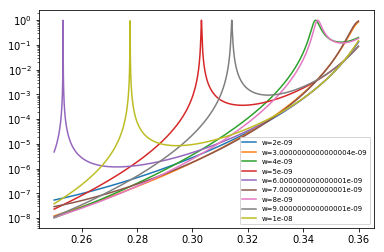

In [3]:
def lista3():
    me = 9.109383e-31 # kg  # declaration of variables
    hbar = 1.053571e-34 # Js
    eV = 1.602176e-19 # J
    mw = me * 0.067
    mb = me * 0.1
    #E = 0.1
    V = 0.334 * eV
    b = 10 * 1e-9
    #w = 10 * 1e-9
    z = cmath.sqrt(-1)
    Ener = []
    Tran = []
    for w in range(2, 11):
        w = w * 1e-9
        for e in range(25000, 36000):
            if e == 33400:
                continue
            else:
                e = e * 0.00001
                k = cmath.sqrt(2*mw*e*eV/hbar**2)
                K = cmath.sqrt(2*mb*(V-e*eV)/hbar**2)
                M1 = np.ones((2,2), dtype='complex')
                M1[1][0] = cmath.sqrt(-1) * k / mw
                M1[1][1] = -cmath.sqrt(-1) * k / mw
                M2 = np.ones((2,2), dtype='complex')
                M2[1][0] = K / mb
                M2[1][1] = -K / mb
                M3 = np.ones((2,2), dtype='complex')
                M3[0][0] = cmath.exp(K * b)
                M3[0][1] = cmath.exp(-K * b)
                M3[1][0] = K * cmath.exp(K * b) / mb
                M3[1][1] = -K * cmath.exp(-K * b) / mb
                M4 = np.ones((2,2), dtype='complex')
                M4[0][0] = cmath.exp(cmath.sqrt(-1) * k * b)
                M4[0][1] = cmath.exp(-cmath.sqrt(-1) * k * b)
                M4[1][0] = cmath.sqrt(-1) * k * cmath.exp(cmath.sqrt(-1) * k * b) / mw
                M4[1][1] = -cmath.sqrt(-1) * k * cmath.exp(-cmath.sqrt(-1) * k * b) / mw
                M5 = np.ones((2,2), dtype='complex')
                M5[0][0] = cmath.exp(cmath.sqrt(-1) * k * (b + w))
                M5[0][1] = cmath.exp(-cmath.sqrt(-1) * k * (b + w))
                M5[1][0] = cmath.sqrt(-1) * k * cmath.exp(cmath.sqrt(-1) * k * (b + w)) / mw
                M5[1][1] = -cmath.sqrt(-1) * k * cmath.exp(-cmath.sqrt(-1) * k * (b + w)) / mw
                M6 = np.ones((2,2), dtype='complex')
                M6[0][0] = cmath.exp(K * (b + w))
                M6[0][1] = cmath.exp(-K * (b + w))
                M6[1][0] = K * cmath.exp(K * (b + w)) / mb
                M6[1][1] = -K * cmath.exp(-K * (b + w)) / mb
                M7 = np.ones((2,2), dtype='complex')
                M7[0][0] = cmath.exp(K * (2 * b + w)) 
                M7[0][1] = cmath.exp(-K * (2 * b + w))
                M7[1][0] = K * cmath.exp(K * (2 * b + w)) / mb
                M7[1][1] = -K * cmath.exp(-K * (2 * b + w)) / mb
                M8 = np.ones((2,2), dtype='complex')
                M8[0][0] = cmath.exp(cmath.sqrt(-1) * k * (2 * b + w))
                M8[0][1] = 0
                M8[1][0] = cmath.sqrt(-1) * k * cmath.exp(cmath.sqrt(-1) * k * (2 * b + w)) / mw
                M8[1][1] = 0
                M = np.zeros((2,2), dtype='complex')
                M = np.matmul(np.linalg.inv(M1), M2)
                M = np.matmul(M, np.linalg.inv(M3))
                M = np.matmul(M, M4)
                M = np.matmul(M, np.linalg.inv(M5))
                M = np.matmul(M, M6)
                M = np.matmul(M, np.linalg.inv(M7))
                M = np.matmul(M, M8)
                T = 1 / (M[0][0] * np.conj(M[0][0]))
                T = float(T)
                Tran.append(T)
                Ener.append(e)
        plt.plot(Ener, Tran, label="w=%s"%(w,))
        Tran = [] 
        Ener = []
    plt.legend(loc='lower right', fontsize='x-small')
    plt.yscale('log')
    plt.show()
lista3()

Lista 4

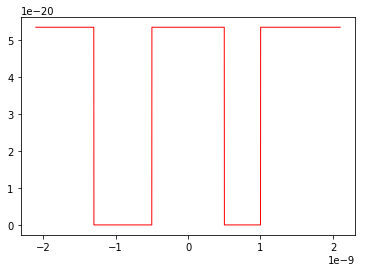

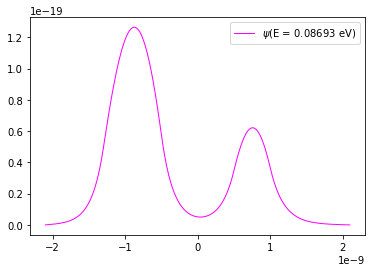

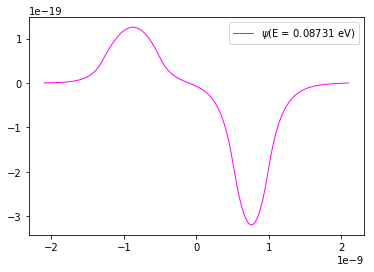

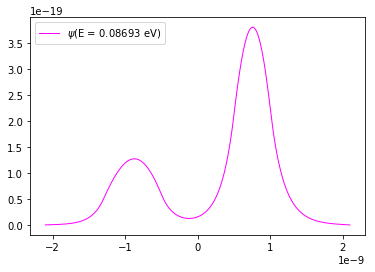

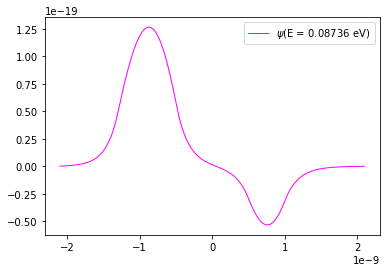

-7.418032651134629e-43

In [4]:
import numpy as np
import matplotlib.pyplot as plt

hbar=1.0546*10**(-34)
m1=0.067*9.10938356*10**(-31)
m2=0.1*9.10938356*10**(-31)
V0=0.334*1.602*10**(-19)
wL = 0.8*10**(-9)      #szerokosc studniLEFT
wR = 0.5*10**(-9)      #szerokosc studniRIGHT
b = 10**(-9)  #szerokosc bariery
e = 1.602*10**(-19)
sila = 1


#dwie studnie z barierą
def V2(x, F=sila, widthL=wL, widthR=wR, bound=b, V0=V0, ec=e):
    if( abs(x) < bound/2): return V0-ec*F*x
    elif ( x > bound/2 + widthR ): return V0-ec*F*x
    elif ( x < -bound/2 -widthL ): return V0-ec*F*x
    else: return 0-ec*F*x

#funkcja zwracająca odpowiednia mase
def m(x,F=sila, m1=m1,m2=m2):
    if( V2(F, sila)< (V0-(e*F*x))): return m2
    else: return m1

#trzeba wybrac odpowiedni potencjal
def func(x, sila, rys=0):
    for i in range (1):
        zakres = 3000
        psi=np.zeros(zakres+1)
        psia=np.zeros(zakres+1)
        dz = 10**(-11)
        psi[0]=0
        psia[0]=1
        iter1 = np.arange(0,zakres+1,1)
        for i in range(zakres):
            psi[i+1] = psi[i]+m(((-zakres/2)+i)*1.4*10**(-12), sila)*psia[i]*dz
            psia[i+1] = psia[i]+(2./(hbar**2))*(V2(((-zakres/2)+i)*1.4*10**(-12), sila)-x)*psi[i]*dz
        if(rys==1):
            plt.plot(((-zakres/2)+iter1)*1.4*10**(-12), psi/(1.602*10**(-19)), linewidth=1, color='magenta', label=r'$\psi$(E = %.5f eV)' %(x/(1.602*10**(-19))), zorder=1)
            plt.legend()
            plt.show()
    return psi[zakres]


def funcp(x, sila):
    h = 10**(-10)
    hx = h*x
    y = 0.5*(func(x+hx, sila) - func(x-hx, sila))/hx
    #print(y)
    return y

def newton(x1, sila):
    x0=x1
    x1=0.334*1.602*10**(-19)
    f0 = func(x0, sila)
    i = 500
    eps = 10**(-15)
    while (i and (abs((x1-x0)/x1)> eps)):
        f1 = funcp(x0, sila)
        x1 = x0
        x0 = x0 - f0/f1
        f0 = func(x0, sila)
        i = i-1
        if (i==0):
            return -1000
    return x0




Ener = np.arange(-2.1,2.1,0.001)
Ener = Ener*10**(-9)
Ener1 = np.arange(-2.1,2.1,0.001)
j=0
for i in Ener:
    Ener1[j] = V2(i)
    j+=1

plt.plot(Ener, Ener1,linewidth=1, color='red')
plt.show()



func(0.08693457*(1.602*10**(-19)),30.25*10**6,1)
func(0.08731298*(1.602*10**(-19)),30.25*10**6,1)

func(0.08693403*(1.602*10**(-19)),30.6*10**6,1)
func(0.08735726*(1.602*10**(-19)),30.6*10**6,1)



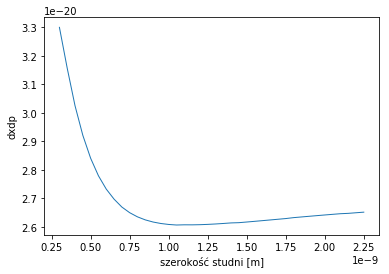

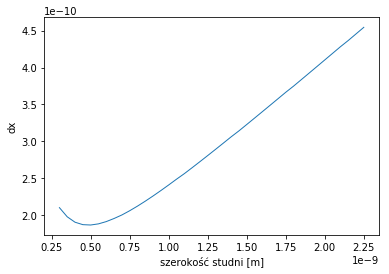

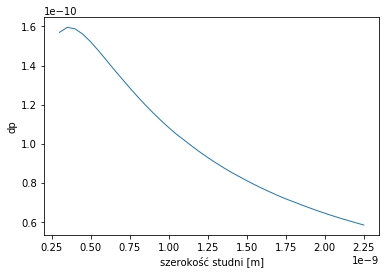

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integral
hbar=1.0546*10**(-34)
m1=0.067*9.10938356*10**(-31)
m2=0.1*9.10938356*10**(-31)
V0=0.334*1.602*10**(-19)
w = 1*10**(-9)  #szerokosc bariery
e = 1.602*10**(-19)

dxdp = []
dx = []
dp = []

energie = []
#studnia o szerokosci w
def V2(x, width=w, V0=V0):
    if( abs(x) < width/2): return 0
    else: return V0

#funkcja zwracająca odpowiednia mase
def m(x, width=w, m1=m1,m2=m2):
    if( V2(x,width)==0): return m2
    else: return m1

#trzeba wybrac odpowiedni potencjal
def func(x, width=w, rys=0):
    for i in range (1):
        zakres = 3000
        xx=np.array([])
        for j in range(zakres+1):
            xx=np.append(xx,((-zakres/2)+j)*1.4*10**(-12))
        psi=np.array([.0]*(zakres+1))
        psia=np.array([.0]*(zakres+1))
        diff=np.array([.0]*(zakres+1))
        diff2=np.array([.0]*(zakres+1))
        dz = 10**(-11)
        diff[0]=m(((-zakres/2))*1.4*10**(-12),width)
        psi[0]=0.0
        diff2[0] = 0.0
        psia[0]=1.0
        iter1 = np.arange(0,zakres+1,1)
        for i in range(zakres):
            diff[i+1] = m(((-zakres/2)+i)*1.4*10**(-12), width)*psia[i]
            psi[i+1] = psi[i]+diff[i+1]*dz
            diff2[i+1]  = (2./(hbar**2))*(V2(((-zakres/2)+i)*1.4*10**(-12),width)-x)*psi[i]
            psia[i+1] = psia[i]+diff2[i+1]*dz

        if(rys==1):
            A=1/np.sqrt(integral.simps(((psi)*(psi)),xx))
            mean_x_2 = integral.simps(A*psi*A*psi*xx,xx)**2
            mean_x2 = integral.simps(A*psi*A*psi*xx*xx,xx)
            vardx = np.sqrt(mean_x2 - mean_x_2)
            mean_p_2 = np.real((-1j*hbar*integral.simps(A*psi*A*diff,xx))**2)
            mean_p2 = -hbar**2*integral.simps(A*psi*A*diff2,xx)
            vardp = np.sqrt(mean_p2 - mean_p_2)
            dx.append(vardx)
            dp.append(vardp)
            dxdp.append(vardx*vardp)
    return psi[zakres]


def funcp(x, width=w):
    h = 10**(-12)
    hx = h*x
    y = 0.5*(func(x+hx, width) - func(x-hx, width))/hx
    return y

def newton(x1, width=w):
    x0=x1
    x1=0.334*1.602*10**(-19)
    f0 = func(x0, width)
    i = 500
    eps = 10**(-15)
    while (i and (abs((x1-x0)/x1)> eps)):
        f1 = funcp(x0, width)
        x1 = x0
        x0 = x0 - f0/f1
        f0 = func(x0, width)
        i = i-1
        if (i==0):
            return -1000
    return x0




for p in range(40):
    j = 0
    Ener = np.arange(0.001,0.015,0.001)
    Ener1 = np.arange(0.001,0.015,0.001)
    Ener = Ener*1.602*10**(-19)
    for i in Ener:
        Ener1[j] = newton(i, (0.3+0.05*p)*10**(-9))
        j+=1

    energy = np.unique(Ener1.round(decimals=30))

    sortenergy = np.sort(energy[np.where(energy < V0)])
    energie.append(sortenergy[0])
    
widths = np.array([(0.3+0.05*i)*10**(-9) for i in range(len(energie))])


for i in range(len(energie)):
    func(energie[i],widths[i],1)

plt.plot(widths, dxdp, linewidth=1, zorder=1)
plt.xlabel("szerokość studni [m]")
plt.ylabel("dxdp")
plt.show()

plt.plot(widths, dx, linewidth=1, zorder=1)
plt.xlabel("szerokość studni [m]")
plt.ylabel("dx")
plt.show()

plt.plot(widths, dp, linewidth=1, zorder=1)
plt.xlabel("szerokość studni [m]")
plt.ylabel("dp")
plt.show()